In [2]:
# from PIL import Image
import numpy as np
import IPython.display
from random import randint
from Bio import SeqIO
import math
from hilbert import HilbertCurve

fasta_file = "myco_genome.fasta"
lines_file = "genome_lines.png"
hilbert_file = "genome_hilbert.png"
mask_file = "genome_mask.png"


ModuleNotFoundError: No module named 'Bio'

In [5]:

pixels = [
   [(54, 54, 54), (232, 23, 93), (71, 71, 71), (168, 167, 167)],
   [(204, 82, 122), (54, 54, 54), (168, 167, 167), (232, 23, 93)],
   [(71, 71, 71), (168, 167, 167), (54, 54, 54), (204, 82, 122)],
   [(168, 167, 167), (204, 82, 122), (232, 23, 93), (54, 54, 54)]
]

h = 100
w = 100
pixels1 = [ [(randint(0, 255), 0, 0) for j in range(h)] for i in range(w) ]


# Convert the pixels into an array using numpy
array = np.array(pixels1, dtype=np.uint8)

# # Use PIL to create an image from the new array of pixels
# new_image = Image.fromarray(array)
# new_image.save('new.png')
# IPython.display.Image("new.png")

(100, 100, 3)


In [2]:
#READ SEQ
for seq_record in SeqIO.parse(fasta_file, "fasta"):
    seqarray = np.asarray(seq_record.seq)  

In [13]:
#PIC_LINES
square = math.trunc(math.sqrt(seqarray.size))
# square = 100
array = np.zeros(square**2, dtype = (np.uint8, 3))

for index in range(array.size // 3):
    base = seqarray[index] 
    if base=="A":
        array[index][0] = 255
    if base=="T":
        array[index][1] = 255
    if base=="C":
        array[index][2] = 255
        

print(array.shape)
array = array.reshape((square, square, 3)) 
print(array.shape)

(4397409, 3)
(2097, 2097, 3)


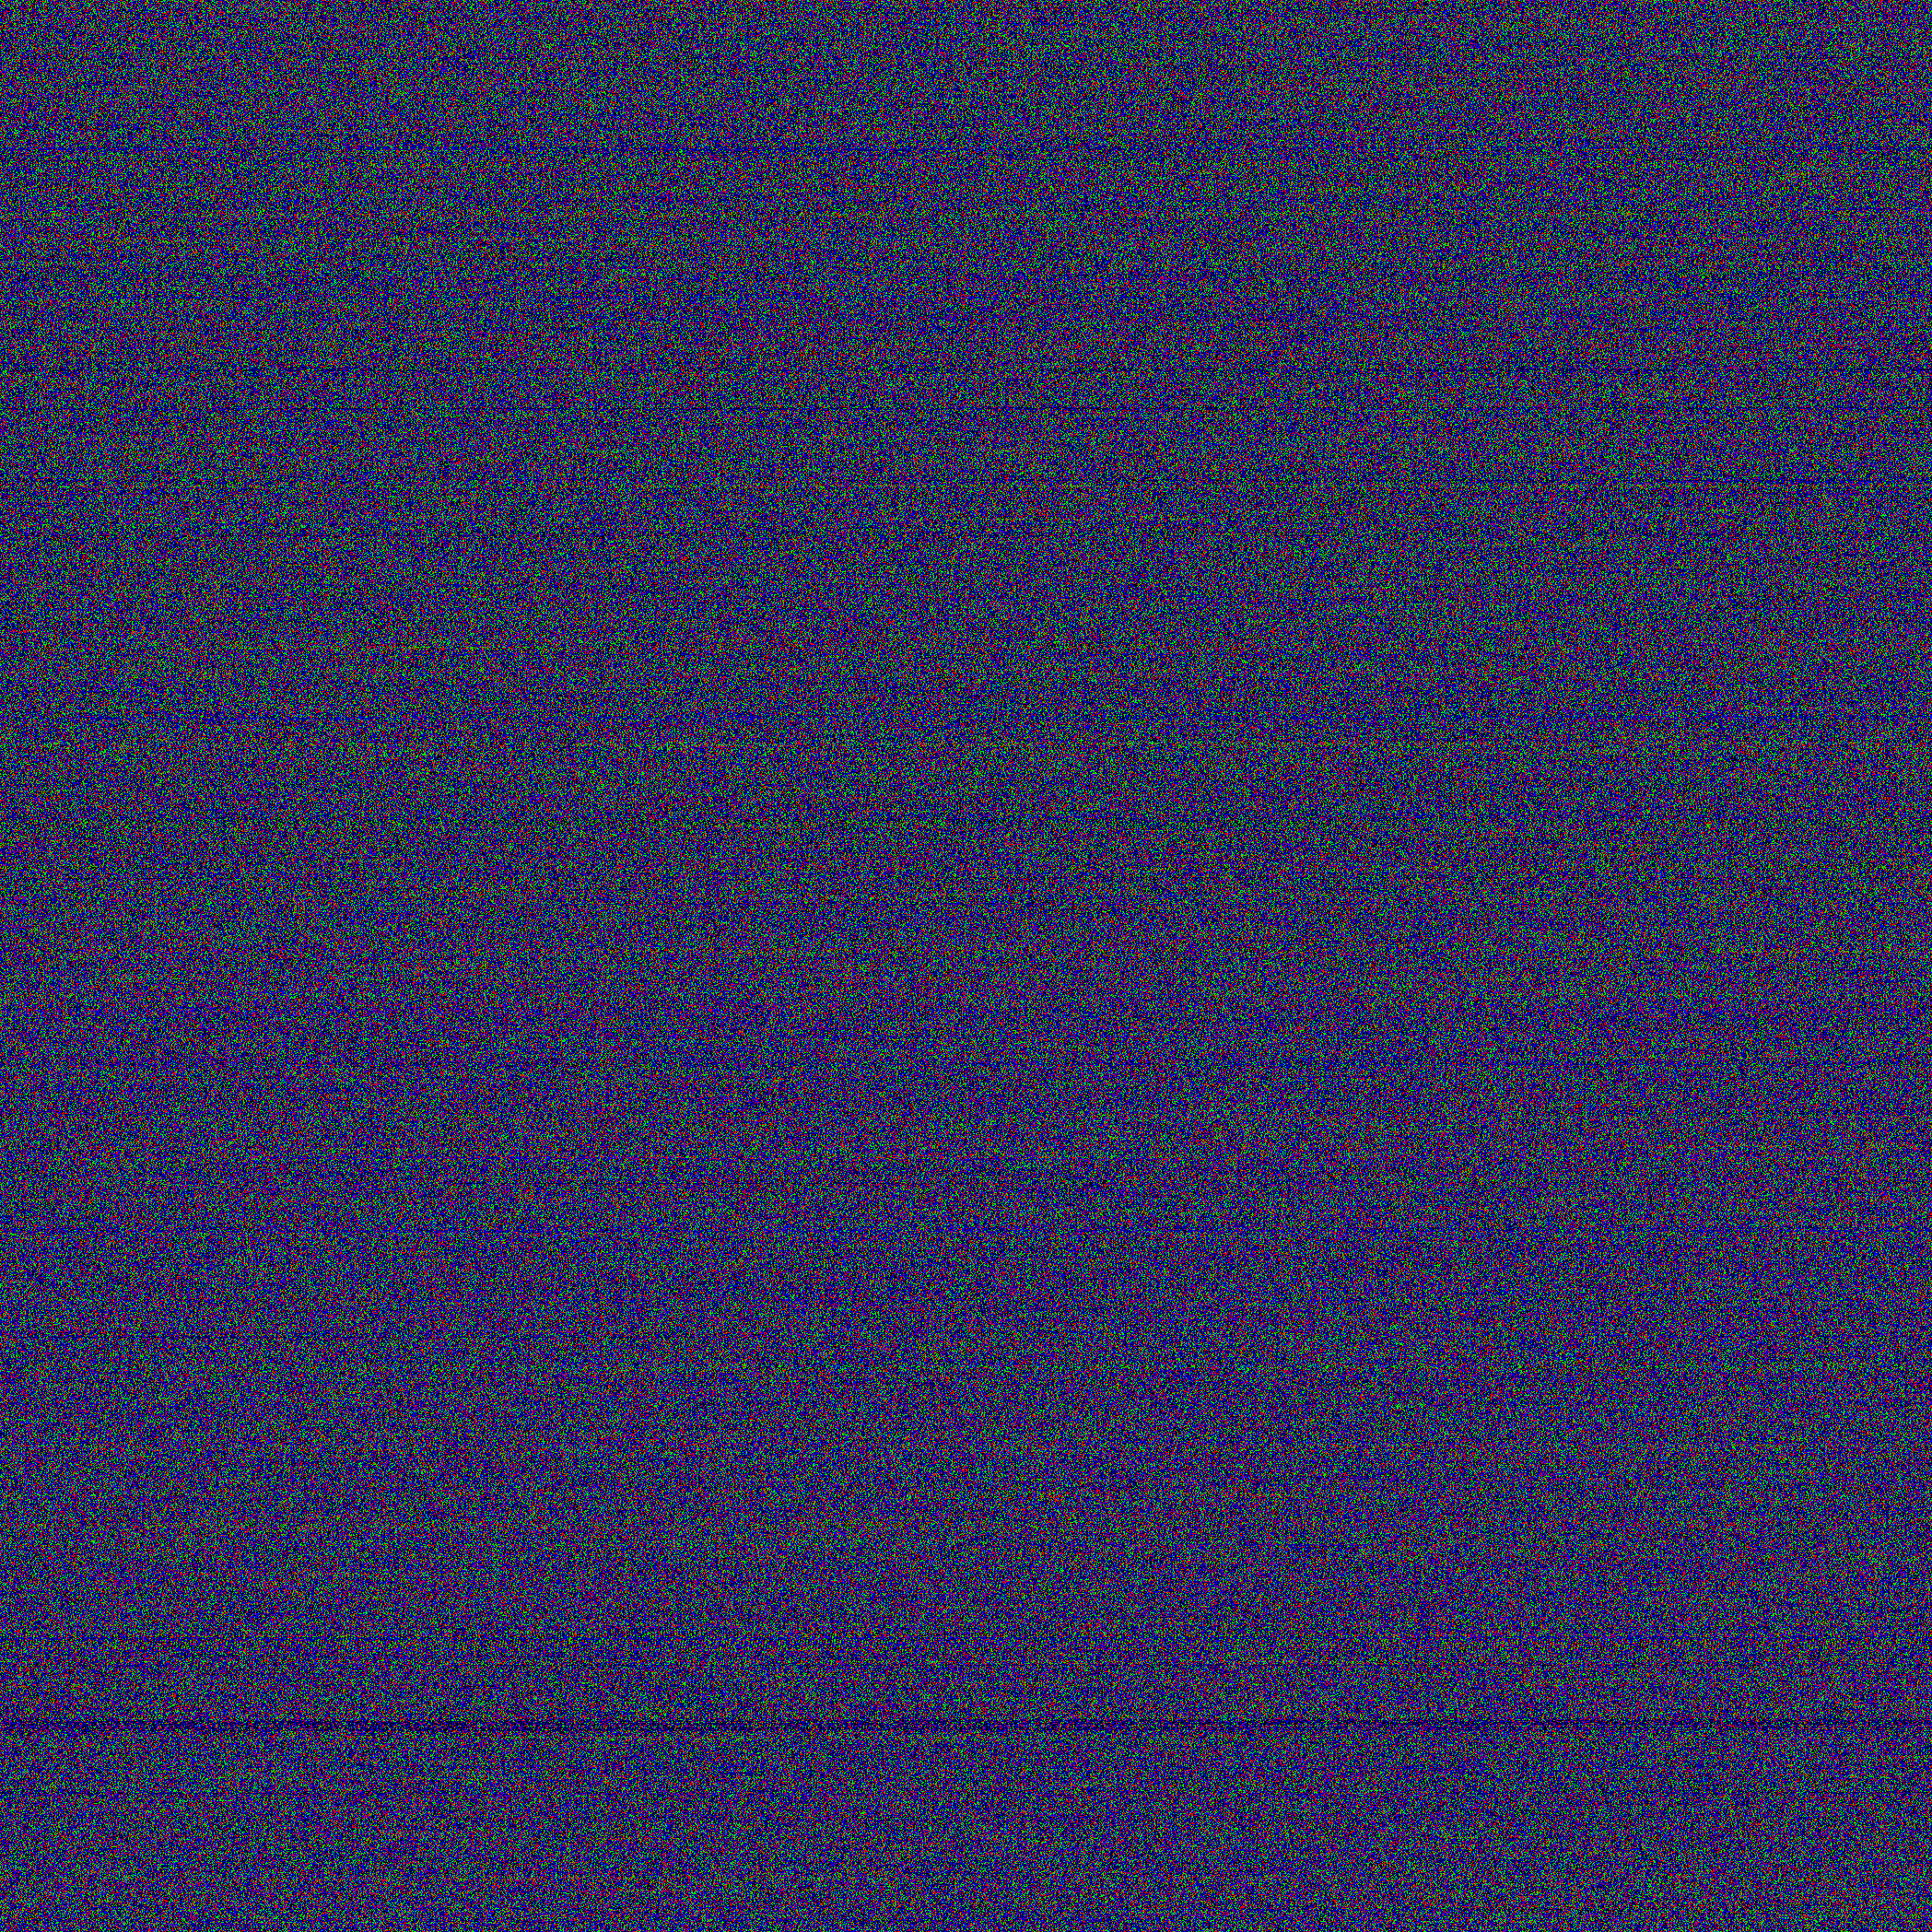

In [14]:
new_image = Image.fromarray(array)
new_image.save(lines_file)
IPython.display.Image(lines_file)  

In [3]:
import sys
sys.path.append('./hilbert_curve')
from hilbert import HilbertCurve

N=2
p=1
lenght = 2 ** (N*p)
hilbert_curve = HilbertCurve(p, N)
for ii in range(lenght):
    coords = hilbert_curve.coordinates_from_distance(ii)
    print(f'coords(h={ii}) = {coords}')

coords(h=0) = [0, 0]
coords(h=1) = [0, 1]
coords(h=2) = [1, 1]
coords(h=3) = [1, 0]


In [3]:
#PIC_HILBERT
N = 2
p = math.trunc(math.log(seqarray.size, 4)) - 3
print(p)
square = 2 ** p

length = 2 ** (N*p)
hilbert_curve = HilbertCurve(p, N)

array = np.zeros((square, square), dtype = (np.uint8, 3))

channels = {"A": 0, "T": 1, "C": 2}
# if "A" in channels:
#     print(1)

for index in range(array.size // 3):
    base = seqarray[index]
    if base in channels:
        channel = channels[base]
        coords = hilbert_curve.coordinates_from_distance(index)
        x, y = coords[0], coords[1]
        array[x][y][channel] = 255
        

8


65536_genome_hilbert.png


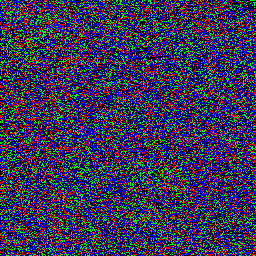

In [4]:
new_image = Image.fromarray(array)
new_image.save(hilbert_file)
IPython.display.Image(hilbert_file)  

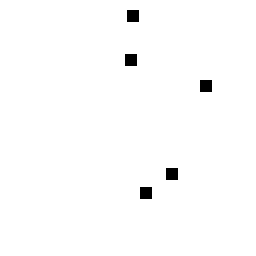

In [5]:
#MASK
mask = np.zeros((square, square), dtype=(np.uint8, 3))
number = 5
diameter = int(0.05 * square)

mask.fill(255)
for i in range(number):
    x = randint(0, square - diameter)
    y = randint(0, square - diameter)
    
    for xi in range(x, x+diameter):
        for yi in range(y, y+diameter):
            mask[xi][yi][0:3] = [0, 0, 0]
            
new_image = Image.fromarray(mask)
new_image.save(mask_file)
IPython.display.Image(mask_file) 

In [4]:
import Bio

ModuleNotFoundError: No module named 'Bio'